In [2]:
import glob
import csv
import cv2
import matplotlib.pyplot as mp
import keras
import numpy as np
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

/home/indhu/anaconda3/envs/IntroToTensorFlow/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(6000, 480, 640, 3)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(1000,)
(6000,)
3.0


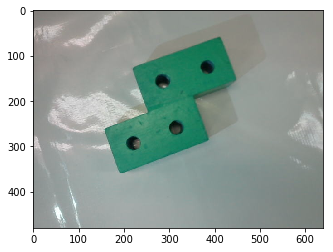

In [3]:

samples = []

j = []
l = []
o = []
s = []
t = []
z = []

j = (glob.glob('/home/indhu/Videos/wro/train/j/*.jpg'))
l = (glob.glob('/home/indhu/Videos/wro/train/l/*.jpg'))
o = (glob.glob('/home/indhu/Videos/wro/train/o/*.jpg'))
s = (glob.glob('/home/indhu/Videos/wro/train/s/*.jpg'))
t = (glob.glob('/home/indhu/Videos/wro/train/t/*.jpg'))
z = (glob.glob('/home/indhu/Videos/wro/train/z/*.jpg'))

for sample in j:
    image = cv2.imread(sample)
    samples.append(image)
    
for sample in l:
    image = cv2.imread(sample)
    samples.append(image)
    
for sample in o:
    image = cv2.imread(sample)
    samples.append(image)
    
for sample in s:
    image = cv2.imread(sample)
    samples.append(image)
    
for sample in t:
    image = cv2.imread(sample)
    samples.append(image)
    
for sample in z:
    image = cv2.imread(sample)
    samples.append(image)
    
X_train = np.array(samples)    
print(X_train.shape)

y_j = np.zeros(len(j))
print(y_j.shape)

y_l = np.ones(len(l))
print(y_l.shape)

y_o = np.array(y_j)
y_o.fill(2)
print(y_o.shape)

y_s = np.array(y_j)
y_s.fill(3)
print(y_s.shape)

y_t = np.array(y_j)
y_t.fill(4)
print(y_t.shape)

y_z = np.array(y_j)
y_z.fill(5)
print(y_z.shape)

y_train = np.concatenate((y_j,y_l,y_o,y_s,y_t,y_z))
print(y_train.shape)

mp.imshow(X_train[3500])
print(y_train[3500])


(450, 480, 640, 3)
(150, 480, 640, 3)
(450,)
(150,)
5.0


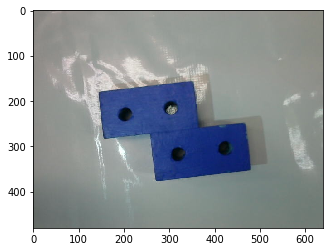

In [35]:
samples1 = []

jt = (glob.glob('/home/indhu/Videos/wro/validation/j/*.jpg'))
lt = (glob.glob('/home/indhu/Videos/wro/validation/l/*.jpg'))
ot = (glob.glob('/home/indhu/Videos/wro/validation/o/*.jpg'))
st = (glob.glob('/home/indhu/Videos/wro/validation/s/*.jpg'))
tt = (glob.glob('/home/indhu/Videos/wro/validation/t/*.jpg'))
zt = (glob.glob('/home/indhu/Videos/wro/validation/z/*.jpg'))

for sample in jt:
    image = cv2.imread(sample)
    samples1.append(image)
    
for sample in lt:
    image = cv2.imread(sample)
    samples1.append(image)
    
for sample in ot:
    image = cv2.imread(sample)
    samples1.append(image)
    
for sample in st:
    image = cv2.imread(sample)
    samples1.append(image)
    
for sample in tt:
    image = cv2.imread(sample)
    samples1.append(image)
    
for sample in zt:
    image = cv2.imread(sample)
    samples1.append(image)
    
X_test = np.array(samples1)    
#print(X_test.shape)

y_j = np.zeros(len(jt))
#print(y_j.shape)

y_l = np.ones(len(lt))
#print(y_l.shape)

y_o = np.array(y_j)
y_o.fill(2)
#print(y_o.shape)

y_s = np.array(y_j)
y_s.fill(3)
#print(y_s.shape)

y_t = np.array(y_j)
y_t.fill(4)
#print(y_t.shape)

y_z = np.array(y_j)
y_z.fill(5)
#print(y_z.shape)

y_test = np.concatenate((y_j,y_l,y_o,y_s,y_t,y_z))

shuffle(X_test,y_test)
valid_x,x_test,valid_y,y_test1 = train_test_split(X_test,y_test)
print(valid_x.shape)
print(x_test.shape)
print(valid_y.shape)
print(y_test1.shape)


mp.imshow(x_test[100])
print(y_test1[100])



In [5]:
from keras.models import Sequential
from keras.layers.core import Dense,Flatten,Lambda,Dropout,Activation
from keras.layers import Cropping2D , BatchNormalization
from keras.layers.convolutional import Conv2D

from keras.models import load_model
from keras.activations import softmax , relu





In [37]:
from keras.utils import to_categorical

y_train1 = to_categorical(y_train)
print(y_train1[50])

valid_y2 = to_categorical(valid_y)
#print(valid_y[200])

y_test2 = to_categorical(y_test1)
print(y_test2[50])


[1. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


In [7]:
model = Sequential()
#model.add(Cropping2D(cropping=((50,20),(0,0)),input_shape=(480,640,3)))
model.add(Lambda(lambda x : (x/255.0 - 0.5),input_shape = (480,640,3)))

model.add(Conv2D(24,kernel_size=(5,5),strides=(2,2),padding='valid'))
model.add(Activation('relu'))
model.add(Conv2D(36,kernel_size=(5,5),strides=(2,2),padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(48,kernel_size=(5,5),strides=(2,2),padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1,epsilon=0.001))


model.add(Conv2D(64,kernel_size=(3,3),padding='valid'))
model.add(Activation('relu'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization(epsilon=0.001))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(50))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(Dense(6))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam')


#model = load_model('/home/indhu/Videos/CAR-ND/CarND-Behavioral-Cloning-P3/model.h5')
#model.fit_generator(train_generator, steps_per_epoch= len(train_samples)//128 , epochs = 3 , verbose=1, validation_data=validation_generator , validation_steps = 2, shuffle = True)
model.fit(X_train,y_train1,batch_size=128,epochs =5,shuffle=True,validation_data = (valid_x,valid_y2))
#model.save('/home/indhu/Videos/CAR-ND/CarND-Behavioral-Cloning-P3/model2.h5')

Train on 6000 samples, validate on 450 samples
Epoch 1/5
6000/6000 [==============================] - 1935s 322ms/step - loss: 2.1040 - val_loss: 13.5392
Epoch 2/5
6000/6000 [==============================] - 1713s 286ms/step - loss: 1.4072 - val_loss: 4.3538
Epoch 3/5
6000/6000 [==============================] - 1697s 283ms/step - loss: 1.2965 - val_loss: 1.5777
Epoch 4/5
6000/6000 [==============================] - 1694s 282ms/step - loss: 1.1968 - val_loss: 2.1319
Epoch 5/5
6000/6000 [==============================] - 1685s 281ms/step - loss: 1.1375 - val_loss: 3.5431


[[0.11111641 0.16079575 0.20169207 0.21996832 0.18868689 0.1177406 ]]
3
2.0


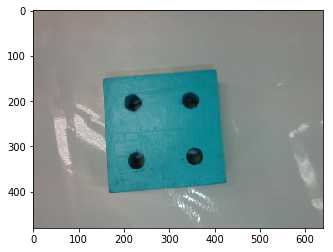

In [27]:

a = model.predict(x_test[99:100])
print(a)
prediction = np.argmax(a)
print(prediction)
mp.imshow(x_test[99])
print(y_test2[99])